In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
from datetime import datetime
import json

In [105]:
name = 'lab02-sp21.csv' # edit this
sp22 = 'sp22' in name
columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
if sp22:
    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

assignment_df = pd.read_csv(name, usecols=[i for i in range(len(columns))]) # 2 is data
assignment_df.columns = columns

assignment_df.head()

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type,data
0,3602,cal/cs61a/sp21/lab02,27909202,2021-01-30 07:05:09,43919,0,file_contents,"{""lab02.py"": ""\ndef lambda_curry2(func):\n ..."
1,3602,cal/cs61a/sp21/lab02,27909202,2021-01-30 07:05:09,43919,0,unlock,"[{""answer timestamp"": 1611961124, ""prompt"": ""W..."
2,3602,cal/cs61a/sp21/lab02,27909314,2021-01-30 07:15:33,43919,0,analytics,"{""requested-questions"": [""hof-wwpd""], ""questio..."
3,3602,cal/cs61a/sp21/lab02,27909314,2021-01-30 07:15:33,43919,0,file_contents,"{""lab02.py"": ""\ndef lambda_curry2(func):\n ..."
4,3602,cal/cs61a/sp21/lab02,27909314,2021-01-30 07:15:33,43919,0,unlock,"[{""prompt"": "">>> def even(f):\n... def odd..."


In [110]:
def generate_num_attempts(name, questions):
    assignments = df.assignment.unique()
    assignment_now = 'cal/cs61a/sp21/lab02' # edit this 
    students = df.student_id.unique()
    
    is_assignment = df.assignment_id == assignment_now
    assignment_data = df[is_assignment]
    assignment_students = assignment_data.student_id.unique()
    
#     name = 'lab02-sp22.csv'
    sp22 = 'sp22' in name

    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
    if sp22:
        columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

    assignment_df = pd.read_csv(name, usecols=[i for i in range(len(columns))]) # 2 is data
    assignment_df.columns = columns
    
    grading_students = assignment_df[assignment_df.message_type == 'grading'].student_id.unique()
    no_grading_students = [student for student in assignment_students if student not in grading_students]
    
    # compute number of attempts per question / edit questions here

    student = 21969
    num_attempts_per_question = {question: {student: 0 for student in grading_students} for question in questions}
    for student in grading_students:
        for row in assignment_df[(assignment_df.student_id == student) & (assignment_df.message_type == 'grading')].itertuples():
        
            data = json.loads(row.data)
            if len(list(data)) != 1:
                continue
            question = list(data)[0]
            if question in num_attempts_per_question:
                num_attempts_per_question[question][student] += 1
    
    for q in questions:
        temp = np.array(list(num_attempts_per_question[q].values()))
        plt.figure()
        print(q + " Number of Attempts Summary Statistics")
        plt.hist(list(temp))
        plt.show()
        print(pd.DataFrame(temp).describe())

Lambda the Free Number of Attempts Summary Statistics


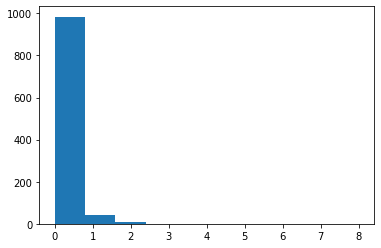

                 0
count  1037.000000
mean      0.075217
std       0.435106
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000
Higher Order Functions Number of Attempts Summary Statistics


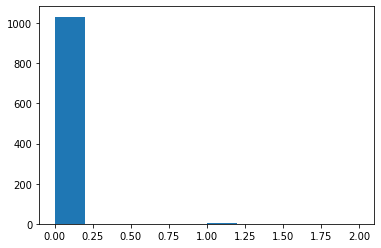

                 0
count  1037.000000
mean      0.005786
std       0.087684
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
hop Number of Attempts Summary Statistics


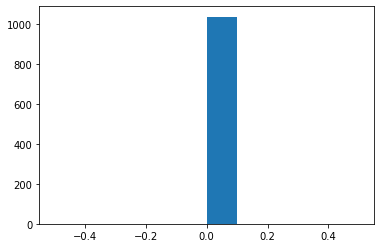

            0
count  1037.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
digit_index_factory Number of Attempts Summary Statistics


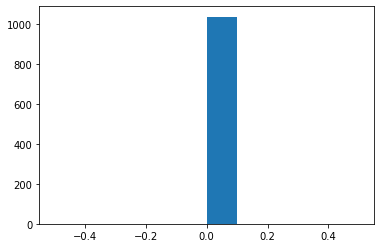

            0
count  1037.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
lambda_curry2 Number of Attempts Summary Statistics


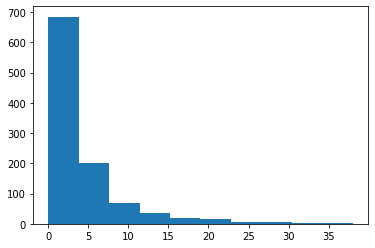

                 0
count  1037.000000
mean      4.109932
std       5.029591
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      38.000000
count_cond Number of Attempts Summary Statistics


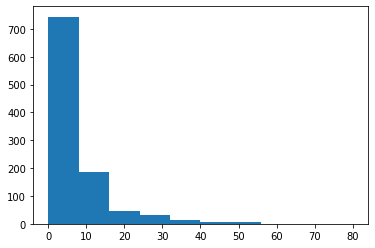

                 0
count  1037.000000
mean      6.648987
std       8.638617
min       0.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      80.000000


In [111]:
generate_num_attempts('lab02-sp21.csv', ['Lambda the Free', 'Higher Order Functions', 'hop', 'digit_index_factory', 'lambda_curry2', 'count_cond'])

In [112]:
def bucket_diffs(timestamps):
    num_buckets = 0

    if len(timestamps) <= 1:
        return None
    
    result, timestamps = [], list(timestamps)
    
    initial_timestamp = parser.parse(timestamps[0])
    
    for i in range(len(timestamps) - 1):
        current_timestamp = parser.parse(timestamps[i])
        next_timestamp = parser.parse(timestamps[i + 1])
        time_temp = (next_timestamp - current_timestamp).total_seconds() / 3600
        
        
        if time_temp >= 1.2:
            num_buckets += 1
            temp_time_to_add = (current_timestamp - initial_timestamp).total_seconds() / 3600
            
            initial_timestamp = next_timestamp
            result.append(temp_time_to_add)
    
    if parser.parse(timestamps[-1]) != initial_timestamp:
        time_temp = (parser.parse(timestamps[-1]) - initial_timestamp).total_seconds() / 3600
        result.append(time_temp)
    
    return result
            

In [113]:
def generate_total_time_spent(name):
    buckets_all_students = assignment_df.groupby('student_id')['timestamp'].agg(bucket_diffs)
    
    bucket_times = [sum(bucket_list) for bucket_list in list(buckets_all_students) if bucket_list != None]
    
    plt.hist(bucket_times)
    
    print(pd.DataFrame(bucket_times).describe())


                 0
count  1068.000000
mean      1.361692
std       1.002457
min       0.000000
25%       0.647153
50%       1.172917
75%       1.827847
max       9.301944


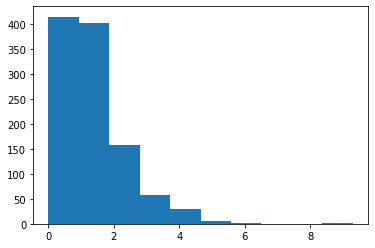

In [114]:
generate_total_time_spent('lab02-sp21.csv')